# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


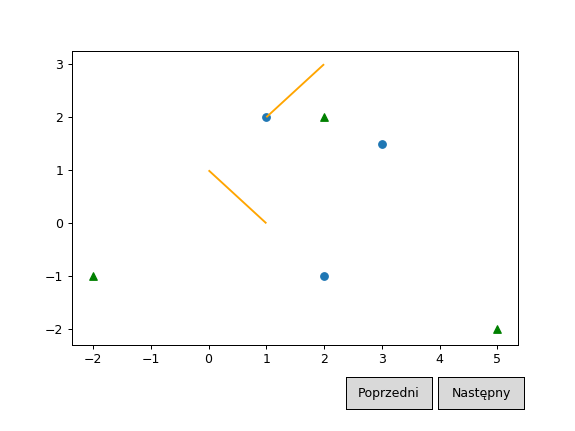

In [14]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie Graham

<IPython.core.display.Javascript object>


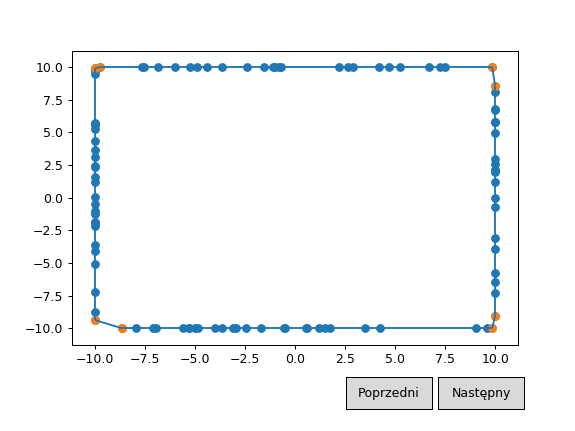

In [10]:
%matplotlib notebook

import graham_algorithm as graham_a
import generating_random_points as rand_p


random_points = rand_p.get_rand_points_rectangle()

result = graham_a.graham(random_points, 10 ** (-8))

lines = []
for i in range(len(result) - 1):
    lines.append([result[i], result[i + 1]])

scenes = [Scene([PointsCollection(random_points),
                PointsCollection(result)],
               [LinesCollection(lines)])]

plot = Plot(scenes)
plot.draw() 

<IPython.core.display.Javascript object>


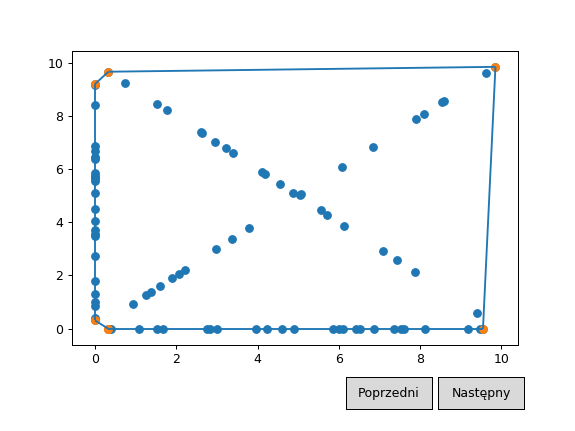

In [11]:
%matplotlib notebook

random_points = rand_p.get_rand_points_rectangle_axis_and_diagonal()
result = graham_a.graham(random_points, 10 ** (-8))

lines = []
for i in range(len(result) - 1):
    lines.append([result[i], result[i + 1]])

scenes = [Scene([PointsCollection(random_points),
                PointsCollection(result)],
               [LinesCollection(lines)])]

plot = Plot(scenes)
plot.draw() 

<IPython.core.display.Javascript object>


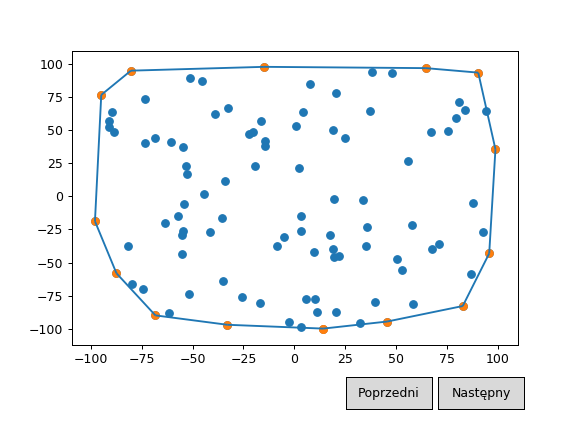

In [12]:
%matplotlib notebook

random_points = rand_p.get_rand_points(100, -100, 100)
result = graham_a.graham(random_points, 10 ** (-8))

lines = []
for i in range(len(result) - 1):
    lines.append([result[i], result[i + 1]])

scenes = [Scene([PointsCollection(random_points),
                PointsCollection(result)],
               [LinesCollection(lines)])]

plot = Plot(scenes)
plot.draw() 

<IPython.core.display.Javascript object>


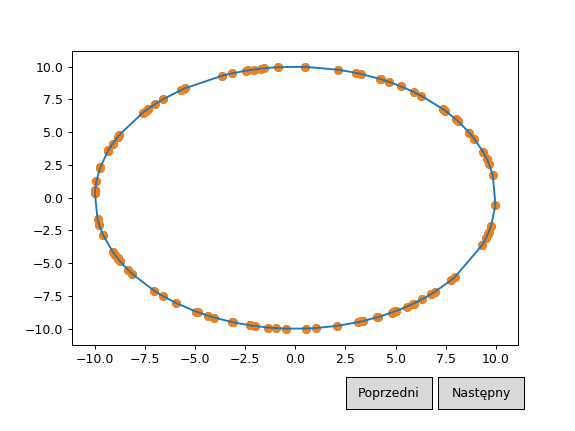

In [13]:
%matplotlib notebook

random_points = rand_p.get_rand_points_circle(100, 10)
result = graham_a.graham(random_points, 10 ** (-8))

lines = []
for i in range(len(result) - 1):
    lines.append([result[i], result[i + 1]])

scenes = [Scene([PointsCollection(random_points),
                PointsCollection(result)],
               [LinesCollection(lines)])]

plot = Plot(scenes)
plot.draw() 

In [8]:
random_points = rand_p.get_rand_points(100, -100, 100)

print(graham_a.time_graham(random_points))

%timeit graham_a.graham(random_points, 10 ** (-8))

AttributeError: module 'graham_algorithm' has no attribute 'time_graham'

### Wizualizacja poszczególnych kroków

In [ ]:
def visualize_graham

### Rozwiązanie Jarvis